# CS 109A/AC 209A/STAT 121A Data Science: Homework 7 (Solutions)
**Harvard University**<br>
**Fall 2016**<br>
**Instructors: W. Pan, P. Protopapas, K. Rader**<br>
**Due Date: ** Wednesday, November 9th, 2016 at 11:59pm

Download the `IPython` notebook as well as the data file from Vocareum and complete locally.

To submit your assignment, in Vocareum, upload (using the 'Upload' button on your Jupyter Dashboard) your solution to Vocareum as a single notebook with following file name format:

`last_first_CourseNumber_HW7.ipynb`

where `CourseNumber` is the course in which you're enrolled (CS 109a, Stats 121a, AC 209a). Submit your assignment in Vocareum using the 'Submit' button.

**Avoid editing your file in Vocareum after uploading. If you need to make a change in a solution. Delete your old solution file from Vocareum and upload a new solution. Click submit only ONCE after verifying that you have uploaded the correct file. The assignment will CLOSE after you click the submit button.**

Problems on homework assignments are equally weighted. The Challenge Question is required for AC 209A students and optional for all others. Student who complete the Challenge Problem as optional extra credit will receive +0.5% towards your final grade for each correct solution. 

Import libraries

In [1]:
import numpy as np
import pandas as pd
import scipy as sp
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn import discriminant_analysis
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn import tree
from sklearn import ensemble
from sklearn.cross_validation import KFold
import StringIO
import matplotlib
import matplotlib.pyplot as plt
import pydot 
%matplotlib inline

## Problem 0: Basic Information

Fill in your basic information. 

### Part (a): Your name

[Last, First]

### Part (b): Course Number

[CS 109a or STATS 121a or AC 209a]

### Part (c): Who did you work with?

[First and Land names of students with whom you have collaborated]

**All data sets can be found in the ``datasets`` folder and are in comma separated value (CSV) format**

## Problem 1: Monitoring Land Cover Changes Using Satellite Images
In the face of rapid urban development and climate change, it is now more urgent than ever for governments (and other organizations) to have a detailed, accurate and up-to-date picture of land use and land cover, as well as how the land use/cover is changing over time, in order to make effective policy decision to manage and protect natural resources. Building such a comprehensive picture of land use/cover for a large region is extremely difficult. 

Recent improvements in satellite imagery and image process have allowed for new tools in land use/cover analysis. The following is an image of the change in vegetation cover around Belize and Guatamala from 1975 to 2007:

<img src="sat.jpg">

In this problem, we will explore how to use classifiers to detect the presence and location of vegetation in satellite images.


### Part 1(a): Detecting vegetation in satellite images

The following files contain sampled locations from satellite aerial images: `dataset_1.txt`, ... `dataset_4.txt`. The first two columns contain the normalized latitude and longitude values. The last column indicates whether or not the location contains vegetation, with 1 indicating the presence of vegetaion and 0 indicating otherwise. 

These small sets of labels are typically generated by hand (that is, locations might be classified based on field studies or by cross-referencing with government databases). Your task is to use the labeled locations to train a model that will predict whether a new location is vegetation or non-vegetation.

- Suppose we were asked to write a computer program to automatically identify the vegetation regions on the landscape. How can we use the model fitting algorithms you have studied so far to identify the boundaries of the vegetation regions? In particular, discuss the suitability of the following algorithms for each of the four data sets: 
    - linear or polynomial linear regression
    - linear or polynomial logistic regression
    - linear or quadratic discriminant analysis
    - decision trees

- By a quick visual inspection of each data set, what do you think is the smallest depth decision tree that would provide a good fit of the vegetation boundaries in each case? Does `sklearn`'s decision tree fitting algorithm always provide a good fit for the proposed depth? If not, explain why. Support your answer with suitable visualization.

We provide you with a function `plot_tree_boundary` to visualize a decision tree model on the data set.

In [18]:
#--------  plot_tree_boundary
# A function that visualizes the data and the decision boundaries
# Input: 
#      x (predictors)
#      y (labels)
#      model (the classifier you want to visualize)
#      title (title for plot)
#      ax (a set of axes to plot on)
# Returns: 
#      ax (axes with data and decision boundaries)

def plot_tree_boundary(x, y, model, title, ax):
    # PLOT DATA
    ax.scatter(x[y==1,0], x[y==1,1], c='green')
    ax.scatter(x[y==0,0], x[y==0,1], c='white')
    
    # CREATE MESH
    interval = np.arange(0,1,0.01)
    n = np.size(interval)
    x1, x2 = np.meshgrid(interval, interval)
    x1 = x1.reshape(-1,1)
    x2 = x2.reshape(-1,1)
    xx = np.concatenate((x1, x2), axis=1)

    # PREDICT ON MESH POINTS
    yy = model.predict(xx)    
    yy = yy.reshape((n, n))

    # PLOT DECISION SURFACE
    x1 = x1.reshape(n, n)
    x2 = x2.reshape(n, n)
    ax.contourf(x1, x2, yy, alpha=0.1, cmap='Greens')
    
    # LABEL AXIS, TITLE
    ax.set_title(title)
    ax.set_xlabel('Latitude')
    ax.set_ylabel('Longitude')
    
    return ax

**Solution:**

Let's load the four datasets and visualize the data. That is, let's plot the data points by longitude and latitude. Let's also color code the points: green if the location is vegetation and white otherwise.

In [5]:
sat_img_1 = pd.read_csv('datasets/dataset_1.txt', delimiter=',', header=None)
sat_img_1.head()

,0,1,2
0,0.566809,0.788130,1
1,0.400046,0.620933,1
2,0.458702,0.536935,1
3,0.474504,0.638224,1
4,0.558707,0.715527,1


In [6]:
sat_img_2 = pd.read_csv('datasets/dataset_2.txt', delimiter=',', header=None)
sat_img_3 = pd.read_csv('datasets/dataset_3.txt', delimiter=',', header=None)
sat_img_4 = pd.read_csv('datasets/dataset_4.txt', delimiter=',', header=None)

sat_images = [sat_img_1, sat_img_2, sat_img_3, sat_img_4]

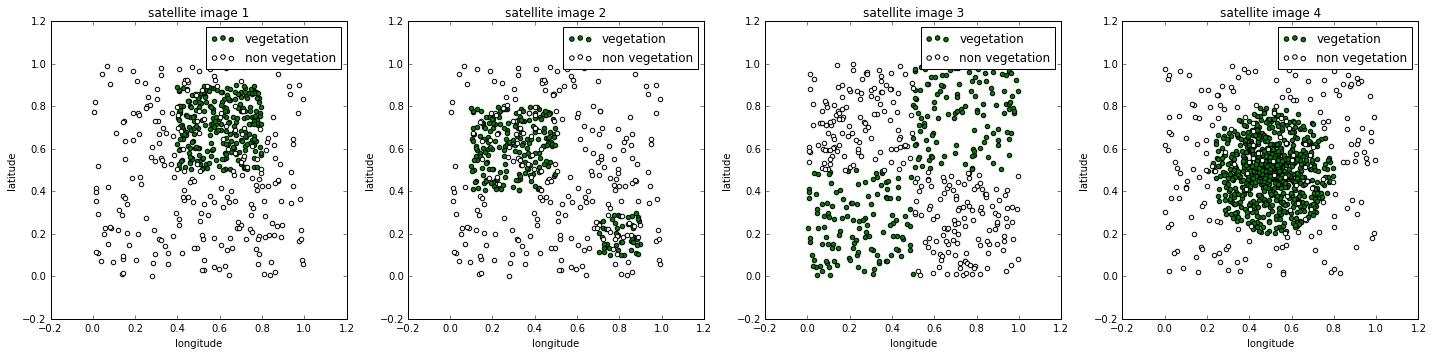

In [7]:
fig, ax = plt.subplots(1, 4, figsize=(20, 5))

for i in range(4):
    x = sat_images[i].values[:, :-1]
    y = sat_images[i].values[:, -1]
    ax[i].scatter(x[y == 1, 0], x[y == 1, 1], c='green', label='vegetation')
    ax[i].scatter(x[y == 0, 0], x[y == 0, 1], c='white', label='non vegetation')
    ax[i].set_xlabel('longitude')
    ax[i].set_ylabel('latitude')
    ax[i].set_title('satellite image {}'.format(i + 1))
    ax[i].legend()
    
plt.tight_layout()
plt.show() 

For each image, based on the sample of we want to train a classifier that will classify a location as vegetation or non-vegetation.

Since the vegetation seem to be clustered in isolated regions in each image. Classifying locations with vegetation involves learning a boundary around each region. We then classify the points inside this region as vegetation and points outside as non-vegetation.

Formally speaking, the vegetation regions in an image can be identified by treating the latitude and longitude values as predictors and the vegetation information as a binary response, and fitting a classification model. The decision boundaries of these classifiers then allow us to identify the vegetation regions.

The vegetation regions in an image can be identified by treating the latitude and longitude values as predictors and the vegetation information as a binary response, and fitting a classification model. The decision boundaries then allow us to identify the vegetation regions.

How can we use the models we have studied so far to identify the boundaries of the vegetation regions? 

Let's consider:

    1. linear or polynomial logistic regression
    2. linear or quadratic discriminant analysis
    3. decision trees

Here are our initial thoughts about each method:

- **Linear or quadratic regression:** Since the task at hand is classification, a regression algorithm is not applicable. We would need to convert the real-valued response predicted by our linear model into a binary classification. 

- **Linear logistic regression / LDA:** If the vegetation regions not rectangular in shape, or if the vegetation regions consists of multiple disconnected patches, a linear classification is not well-suited. Linear classifiers can drawn only one linear bounardy (i.e. separate two distinct rectangular or trapezoidal regions)

- **Quadratic logistic regression / QDA:** These methods will be able to accurately detect the ellipsoid vegetation region in `dataset_4`, but will struggle with capturing sharp corners of the vegetation regions in other datasets.

- **Decision trees:** This method will provide good fits for the first three data sets, where the region boundaries are rectangular. A decision tree is not best suited `dataset_4`; in order to get a good fit, the tree depth needs to be very large. 

Thus, having eliminated linear/polynomial regression, linear logistic regression and LDA, the toss up in performance will be between non-linear logistic, QDA and decision trees. We visualize the decision boundaries of each model on the datasets and perform **qualitative** comparisons.

In [8]:
#--------  plot_decision_boundary
# A function that visualizes the data and the decision boundaries
# Input: 
#      x (predictors)
#      y (labels)
#      model (classifier)
#      poly_flag (fits quadratic model if true, otherwise linear)
#      title (title for plot)
#      ax (a set of axes to plot on)
# Returns: 
#      ax (axes with data and decision boundaries)

def plot_decision_boundary(x, y, model, title, ax, bounds=(0, 1), poly_flag=False):
    # Plot data
    ax.scatter(x[y == 1, 0], x[y == 1, 1], c='green')
    ax.scatter(x[y == 0, 0], x[y == 0, 1], c='white')
    
    # Create mesh
    interval = np.arange(bounds[0], bounds[1], 0.01)
    n = np.size(interval)
    x1, x2 = np.meshgrid(interval, interval)
    x1 = x1.reshape(-1, 1)
    x2 = x2.reshape(-1, 1)
    xx = np.concatenate((x1, x2), axis=1)

    # Predict on mesh points
    if(poly_flag):
        quad_features = preprocessing.PolynomialFeatures(degree=2)
        xx = quad_features.fit_transform(xx)
        
    yy = model.predict(xx)    
    yy = yy.reshape((n, n))

    # Plot decision surface
    x1 = x1.reshape(n, n)
    x2 = x2.reshape(n, n)
    ax.contourf(x1, x2, yy, alpha=0.1, cmap='Greens')
    
    # Label axes, set title
    ax.set_title(title)
    ax.set_xlabel('Latitude')
    ax.set_ylabel('Longitude')
    
    return ax

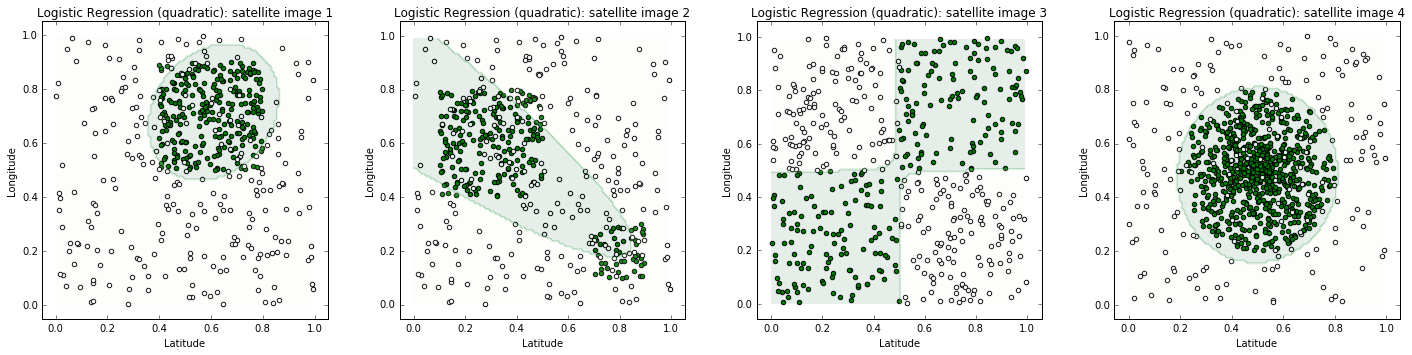

In [10]:
#Plot the data in each dataframe as a subplot of a single figure
fig, ax = plt.subplots(1, 4, figsize=(20, 5))

#Logistic Regression with Quadratic Terms
logreg_poly = linear_model.LogisticRegression(C=1000)

#Iterate through the four images/dataframes
for i in range(4):
    #Get the long/lat coords
    x = sat_images[i].values[:, :-1]
    #Get the class labels
    y = sat_images[i].values[:, -1]  
    
    #Expand our predictor array with quadratic terms
    quad_features = preprocessing.PolynomialFeatures(degree = 2)
    x_expanded = quad_features.fit_transform(x)
    
    #Fit logistic regression model with quadratic decision boundary
    logreg_poly.fit(x_expanded, y)
    
    #Plot the data along with the decision boundary learned by our model
    ax[i] = plot_decision_boundary(x, y, logreg_poly, 'Logistic Regression (quadratic): satellite image {}'.format(i + 1), ax[i], poly_flag=True)
    

plt.tight_layout()
plt.show()

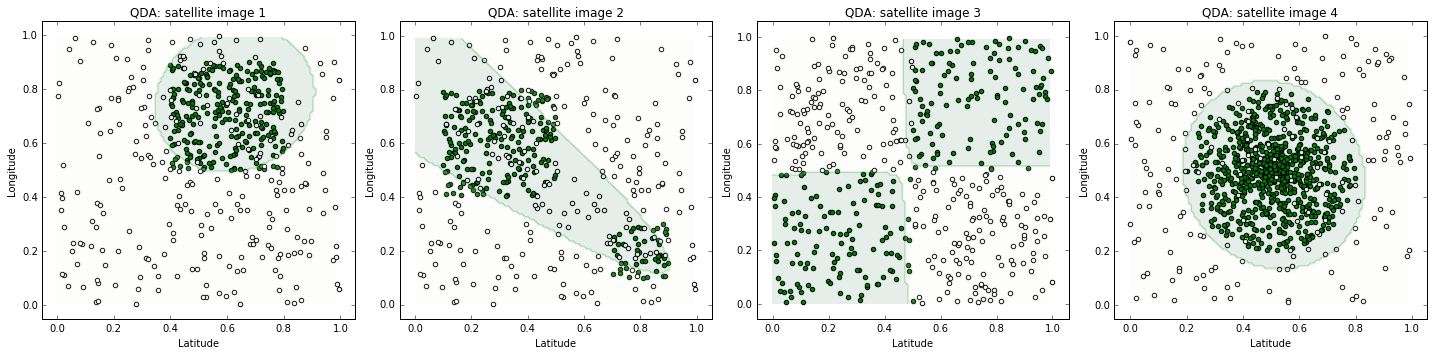

In [11]:
#Plot the data in each dataframe as a subplot of a single figure
fig, ax = plt.subplots(1, 4, figsize=(20, 5))

#Logistic Regression with Quadratic Terms
qda = discriminant_analysis.QuadraticDiscriminantAnalysis()

#Iterate through the four images/dataframes
for i in range(4):
    #Get the long/lat coords
    x = sat_images[i].values[:, :-1]
    #Get the class labels
    y = sat_images[i].values[:, -1]  
    
    #Fit our QDA model
    qda.fit(x, y)
        
    #Plot the data along with the decision boundary learned by our model 
    ax[i] = plot_decision_boundary(x, y, qda, 'QDA: satellite image {}'.format(i + 1), ax[i])
    

plt.tight_layout()
plt.show()

In [24]:
#--------  fit_and_plot_dt
# Fit decision tree with on given data set with given depth, and plot the data/model
# Input: 
#      fname (string containing file name)
#      depth (depth of tree)

def fit_and_plot_dt(x, y, depth, title, ax):
    # FIT DECISION TREE MODEL
    dt = tree.DecisionTreeClassifier(max_depth = depth)
    dt.fit(x, y)

    # PLOT DECISION TREE BOUNDARY
    ax = plot_tree_boundary(x, y, dt, title, ax)
    
    return ax

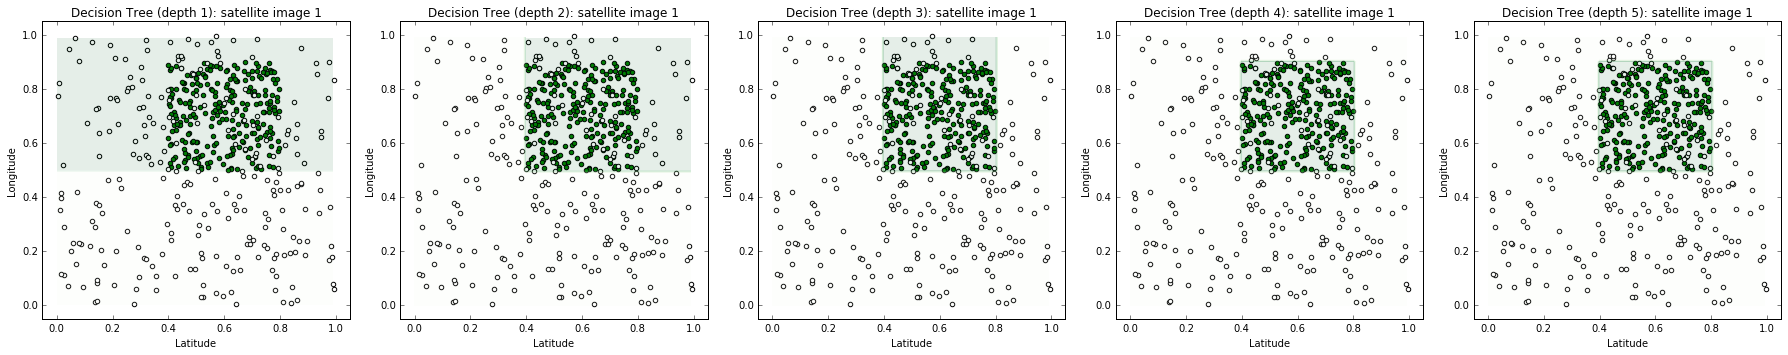

In [25]:
# Plot for dataset_1.txt: depths 1 to 5
fig, ax = plt.subplots(1, len(range(1, 6)), figsize=(25, 5))
x = sat_images[0].values[:, :-1]
y = sat_images[0].values[:, -1]

ind = 0
for i in range(1, 6):
    ax[ind] = fit_and_plot_dt(x, y, i, 'Decision Tree (depth {}): satellite image 1'.format(i), ax[ind]) 
    ind += 1

plt.tight_layout()
plt.show()

Since the vegetation takes the shape of a rectangle, a decision tree of **depth 4** is required, one to check each of left x-limit, right x-limit, lower y-limit and upper y-limit. 

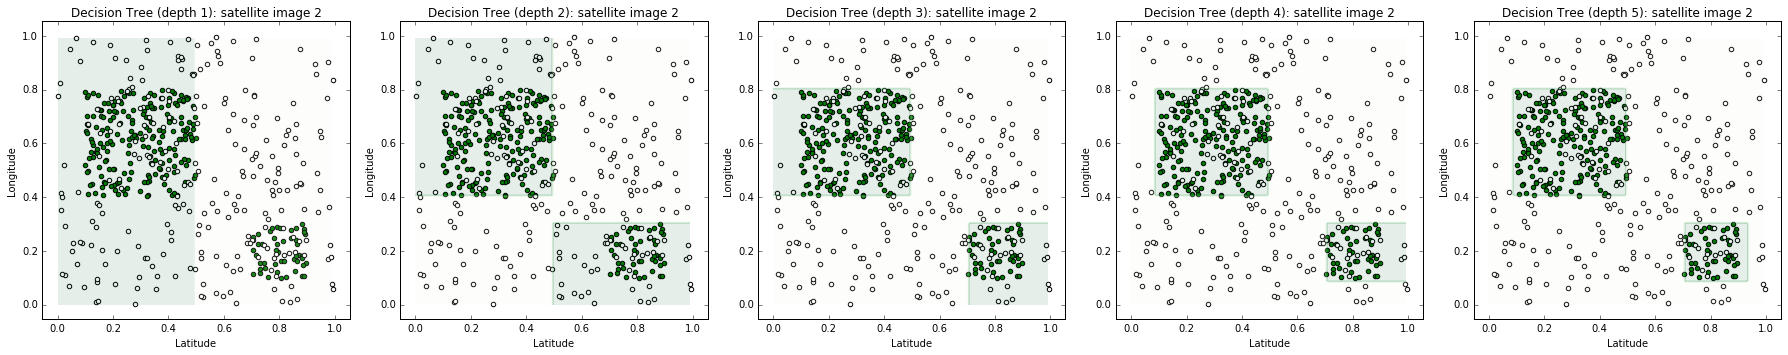

In [26]:
# Plot for dataset_2.txt: depths 1 to 5
fig, ax = plt.subplots(1, len(range(1, 6)), figsize=(25, 5))
x = sat_images[1].values[:, :-1]
y = sat_images[1].values[:, -1]

ind = 0
for i in range(1, 6):
    ax[ind] = fit_and_plot_dt(x, y, i, 'Decision Tree (depth {}): satellite image 2'.format(i), ax[ind]) 
    ind += 1

plt.tight_layout()
plt.show()

The vegetation spans two rectangles, a naive decision tree would require a depth of 8, one for each corner of the two rectangles. However it suffices to use a simpler **5-level** tree: each rectangle can be captured by a decision tree of depth 4, and the root node branches to one of these trees.

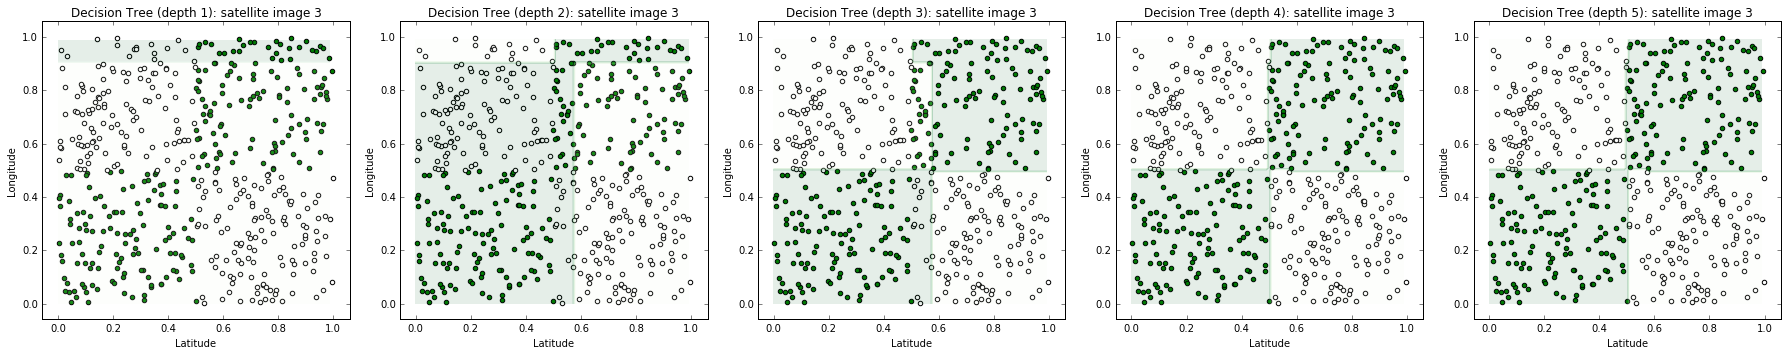

In [27]:
# Plot for dataset_3.txt: depths 1 to 5
fig, ax = plt.subplots(1, len(range(1, 6)), figsize=(25, 5))
x = sat_images[2].values[:, :-1]
y = sat_images[2].values[:, -1]

ind = 0
for i in range(1, 6):
    ax[ind] = fit_and_plot_dt(x, y, i, 'Decision Tree (depth {}): satellite image 3'.format(i), ax[ind]) 
    ind += 1

plt.tight_layout()
plt.show()

A depth 2 decision tree would suffice for this data set. However, due to the **greedy nature** of the fitting algorithm, we need to go up to depth 4 to get a good fit. This is due to a sub-optimal local choice at higher depths.

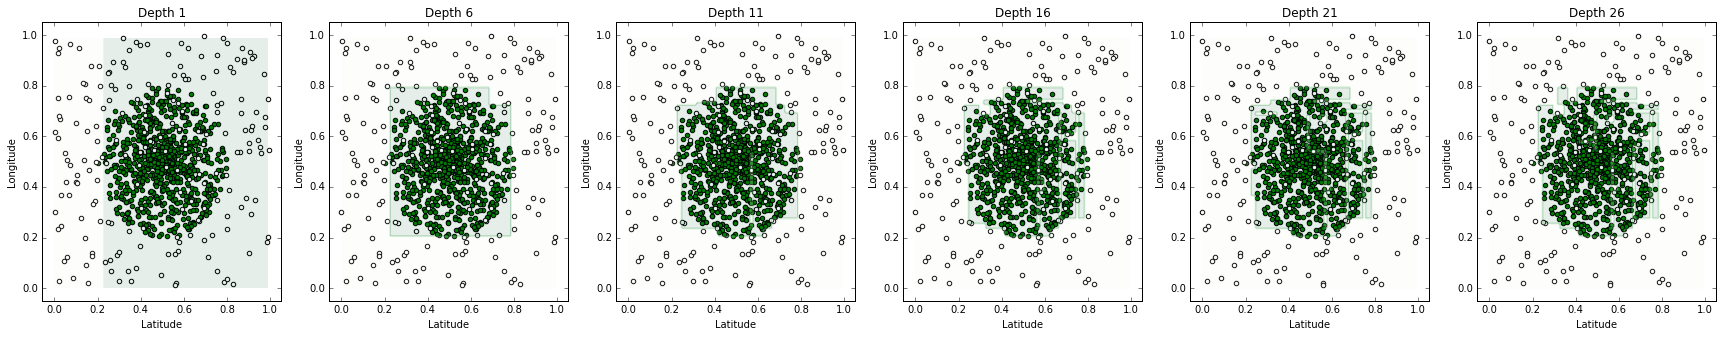

In [28]:
# Plot for dataset_4.txt: depths 4, 10, 25
fig, ax = plt.subplots(1, len(range(1, 27, 5)), figsize=(30, 5))
x = sat_images[3].values[:, :-1]
y = sat_images[3].values[:, -1]
ind = 0
for i in range(1, 27, 5):
    ax[ind] = fit_and_plot_dt(x, y, i, 'Depth {}'.format(i), ax[ind]) 
    ind += 1

Since the vegetation is circular in shape, a decision tree with infinite depth is theoretically required to fit the circular boundary. In practice, since the number of points on the circular boundary is finite, we will need sufficient depth to capture each point on the boundary in its own rectangle.

So which model is more suited for land cover analysis using satellite images? This is for you to decide, but there are several factors to consider:

1. flexibility: if our goal is to capture vegetation that appear in multiple disconnected patches in an image, and if we believe that the vegetation regions have regular as well as irregular boundaries, then it appears that decision trees provide us with the flexibility we need to capture these complex patches.

2. efficiency: if our goal is to minimize train and predict time and minimize the amount of information we need to store per model, then a decision tree (with the depth necessary to capture complex boundaries) may not be what we want.

### Part 1(b). What is the best splitting criterion for decision trees?
Suppose you are given a data set with 100 points in a satellite image, of which 51 are class 1 and 49 are class 0. Consider following two candidate splits for constructing a decision tree: 
1. $((11,37), (40,12))$  
2. $((25,48), (26,1))$

Which of these is a better split according classification error, Gini index, and Entropy criteria? Do the three criteria agree on the best split, or is one better than the other? Support your answer with a concrete explanation.

**Solution:**

Recall that when creating our decision tree, we can decide on a split according classification error, Gini index, and Entropy criteria. Which criterion is better, i.e. yield a better model? Or perhaps all three criteria will always produce the same splits?

Let's explore these three criteria using a simple example.

1. Split 1 = $((11, 37), (40, 12))$  
2. Split 2 = $((25, 48), (26, 1))$

By visual inspection, the split 2 has a very pure node $(26, 1)$ where as the nodes in split 1 are both very mixed. Intuitively, we prefer split 2; if one of the nodes is already pure, there will be a good chance that the nodes in the subsequent splits will generate much purer nodes. 

We're now interested in seeing if the three split criteria agree with our intuitive assessment of the quality of the two splits.

In [20]:
# Calculate classification accuracy for a binary split
def err(x1, x2):
    return min((x1, x2))

# Calculate Gini coefficient for a binary split
def Gini(x1, x2):
    return x1 * (1 - x1) + x2 * (1 - x2)

# Calculate Cross-entropy for a binary split
def entropy(x1, x2):
    return -x1 * np.log(x1) - x2 * np.log(x2)

# Score the quality of a split using a split criterion
def eval_split(criterion, x1, x2, y1, y2, n, n1, n2):
    return (n1 * criterion(x1, x2) + n2 * criterion(y1, y2)) / n

In [19]:
# Split 1:

# Compute split counts
n1 = 48
n2 = 52
n = n1 + n2

# Compute split probabilities
x1 = 11. / n1
x2 = 37. / n1
y1 = 40. / n2
y2 = 12. / n2

print 'Split 1'
print 'Error = ', eval_split(err, x1, x2, y1, y2, n, n1, n2)
print 'Gini = ', eval_split(Gini, x1, x2, y1, y2, n, n1, n2)
print 'Entropy = ', eval_split(entropy, x1, x2, y1, y2, n, n1, n2)

# Split 2:

# Compute split counts
n1 = 73
n2 = 27
n = n1 + n2

# Split 2:
x1 = 25. / n1
x2 = 48. / n1
y1 = 26. / n2
y2 = 1. / n2

print 'Split 2'
print 'Error = ', eval_split(err, x1, x2, y1, y2, n, n1, n2)
print 'Gini = ', eval_split(Gini, x1, x2, y1, y2, n, n1, n2)
print 'Entropy = ', eval_split(entropy, x1, x2, y1, y2, n, n1, n2)

Split 1
Error =  0.23
Gini =  0.354198717949
Entropy =  0.539274531592
Split 2
Error =  0.26
Gini =  0.348026382547
Entropy =  0.511910804521


Split 1 has lower error. Thus, if we use classification error as our split criterion, we'd choose split 1. 

Gini index and entropy chooses Split 2 over Split 1. That is, both criteria prefer the split with purer nodes. 

For this reason, the Gini index and entropy are prefered over classification error for evaluating splits.

`sklearn`'s implementation of decision trees allows you to choose a split criterion (Gini or entropy). The default criterion used by `sklearn` is the Gini index. Try refitting decision tree models on the satellite data using entropy, will the decision boundaries change?

## Problem 2: Loan Risk Assessment
In this problem, you are asked by Bank of America to build a risk assessment model that predicts whether or not it is risky to give a loan to an applicant based on the information provided in their application. The bank will reject the loan applications from applicants labeled risky and approve the applications that are labeled safe by your model.

The relevant training and test sets are provided in the files: `dataset_5_train.txt` and `dataset_5.test.txt`. The first 24 columns contain attributes for each applicant gathered from their application, and the last column contains the credit risk assessment with 1 indicating that the customer is a loan risk, and 0 indicating that the customer is not a loan risk. The names of the attributes are provided in the file `dataset_5_description.txt`.


### Part 2(a): A simple decision tree model
- Fit a simple decision tree of depth 2 to the training set and report its accuracy on the test set. 

- Would you recommend this classifier to Bank of America for making decisions on the loan applications of **real people**? If yes, make an argument for the merrits of this classifer. If no, then make necessary changes to the data set and fit a new classifier that you believe is fair to use in practice, then compare the two classifiers.


We have provided you with a function `display_dt` to display the structure of the decision tree in DOT format.

In [21]:
# Print decision tree model 'dt'
def display_dt(model):
    dummy_io = StringIO.StringIO() 
    tree.export_graphviz(model, out_file = dummy_io) 
    graph = pydot.graph_from_dot_data(dummy_io.getvalue()) 
    graph.write_pdf("tree.pdf") 
    print dummy_io.getvalue()

**Solution:**

Let's read the data and explore it a bit.

In [2]:
# Load train & test data
data_train = np.loadtxt('datasets/dataset_5_train.txt', delimiter=',')
data_test = np.loadtxt('datasets/dataset_5_test.txt', delimiter=',')

# Split label and instances
y_train = data_train[:, -1]
x_train = data_train[:, :-1]

y_test = data_test[:, -1]
x_test = data_test[:, :-1]

print 'x train shape:', x_train.shape
print 'y train shape:', y_train.shape
print 'x test shape:', x_test.shape
print 'y test shape:', y_test.shape

x train shape: (250, 24)
y train shape: (250,)
x test shape: (9750, 24)
y test shape: (9750,)


In [26]:
# Check for missing values

print 'number of rows with missing values in train:', len(x_train[np.isnan(x_train)])
print 'number of rows with missing values in test:', len(x_test[np.isnan(x_test)])

number of rows with missing values in train: 0
number of rows with missing values in test: 0


In [42]:
# Check for range of unique values for each predictor

for i in range(x_train.shape[1]):
    vals = np.unique(x_train[:, i])
    if len(vals) < 15:
        print '(Categorical) {} unique values of predictor {}: {}'.format(len(vals), i, vals)
    else:
        print '(Continuous) range of values of predictor', i, ': {} to {}'.format(x_train[:, i].min(), x_train[:, i].max())

(Categorical) 12 unique values of predictor 0: [ 3001.  3123.  3288.  3298.  3420.  3530.  3540.  3585.  3652.  3662.
  3817.  3827.]
(Continuous) range of values of predictor 1 : 10000.0 to 550000.0
(Categorical) 2 unique values of predictor 2: [ 1.  2.]
(Categorical) 5 unique values of predictor 3: [ 1.  2.  3.  4.  6.]
(Categorical) 3 unique values of predictor 4: [ 1.  2.  3.]
(Continuous) range of values of predictor 5 : 22.0 to 69.0
(Categorical) 6 unique values of predictor 6: [-2. -1.  0.  1.  2.  3.]
(Categorical) 7 unique values of predictor 7: [-2. -1.  0.  2.  3.  4.  6.]
(Categorical) 6 unique values of predictor 8: [-2. -1.  0.  2.  3.  5.]
(Categorical) 6 unique values of predictor 9: [-2. -1.  0.  2.  3.  4.]
(Categorical) 5 unique values of predictor 10: [-2. -1.  0.  2.  3.]
(Categorical) 5 unique values of predictor 11: [-2. -1.  0.  2.  3.]
(Continuous) range of values of predictor 12 : -702.0 to 548551.0
(Continuous) range of values of predictor 13 : -808.0 to 5467

It looks like that all the predictors in the training set have values in the expected range (cross-referencing with `dataset_5_description.txt`) except for $X_3$ (education) and $X_6$ through $X_{11}$ (history of past payment). The former includes the value 6 and the latter includes the value -2, these values are not included in the key.

In [43]:
# Check for range of unique values for each predictor

for i in range(x_test.shape[1]):
    vals = np.unique(x_test[:, i])
    if len(vals) < 15:
        print '(Categorical) {} unique values of predictor {}: {}'.format(len(vals), i, vals)
    else:
        print '(Continuous) range of values of predictor', i, ': {} to {}'.format(x_test[:, i].min(), x_test[:, i].max())

(Categorical) 13 unique values of predictor 0: [ 3001.  3123.  3288.  3298.  3381.  3420.  3530.  3540.  3585.  3652.
  3662.  3817.  3827.]
(Continuous) range of values of predictor 1 : 10000.0 to 760000.0
(Categorical) 2 unique values of predictor 2: [ 1.  2.]
(Categorical) 7 unique values of predictor 3: [ 0.  1.  2.  3.  4.  5.  6.]
(Categorical) 4 unique values of predictor 4: [ 0.  1.  2.  3.]
(Continuous) range of values of predictor 5 : 21.0 to 75.0
(Categorical) 11 unique values of predictor 6: [-2. -1.  0.  1.  2.  3.  4.  5.  6.  7.  8.]
(Categorical) 11 unique values of predictor 7: [-2. -1.  0.  1.  2.  3.  4.  5.  6.  7.  8.]
(Categorical) 11 unique values of predictor 8: [-2. -1.  0.  1.  2.  3.  4.  5.  6.  7.  8.]
(Categorical) 11 unique values of predictor 9: [-2. -1.  0.  1.  2.  3.  4.  5.  6.  7.  8.]
(Categorical) 10 unique values of predictor 10: [-2. -1.  0.  2.  3.  4.  5.  6.  7.  8.]
(Categorical) 10 unique values of predictor 11: [-2. -1.  0.  2.  3.  4.  5.

It looks like that all the predictors in the test set have values in the expected range (cross-referencing with `dataset_5_description.txt`) except for $X_3$ (education), $X_4$ (marital status) and $X_6$ through $X_{11}$ (past payment). $X_3$ includes the value 6, $X_4$ includes the value 0 and $X_6$ through $X_{11}$ include the value -2, these values are not included in the key.

While our data set contains no missing values, it does, however, contain erroneous values. Before deciding how to handel the erroneous values, we check the extent to which they appear in our data.

In [51]:
print 'percent of train data with erroneous X_0 values:', len(x_train[x_train[:, 3] == 6]) * 1.  / len(x_train)
print 'percent of train data with erroneous X_6 values:', len(x_train[x_train[:, 6] == -2]) * 1.  / len(x_train)
print 'percent of train data with erroneous X_7 values:', len(x_train[x_train[:, 7] == -2]) * 1.  / len(x_train)
print 'percent of train data with erroneous X_8 values:', len(x_train[x_train[:, 8] == -2]) * 1.  / len(x_train)
print 'percent of train data with erroneous X_9 values:', len(x_train[x_train[:, 9] == -2]) * 1.  / len(x_train)
print 'percent of train data with erroneous X_10 values:', len(x_train[x_train[:, 10] == -2]) * 1.  / len(x_train)
print 'percent of train data with erroneous X_11 values:', len(x_train[x_train[:, 11] == -2]) * 1.  / len(x_train)

percent of train data with erroneous X_0 values: 0.004
percent of train data with erroneous X_6 values: 0.084
percent of train data with erroneous X_7 values: 0.096
percent of train data with erroneous X_8 values: 0.116
percent of train data with erroneous X_9 values: 0.144
percent of train data with erroneous X_10 values: 0.164
percent of train data with erroneous X_11 values: 0.172


In [54]:
print 'percent of test data with erroneous X_0 values:', len(x_test[x_test[:, 3] == 6]) * 1.  / len(x_test)
print 'percent of test data with erroneous X_4 values:', len(x_test[x_test[:, 4] == 0]) * 1.  / len(x_test)
print 'percent of test data with erroneous X_6 values:', len(x_test[x_test[:, 6] == -2]) * 1.  / len(x_test)
print 'percent of test data with erroneous X_7 values:', len(x_test[x_test[:, 7] == -2]) * 1.  / len(x_test)
print 'percent of test data with erroneous X_8 values:', len(x_test[x_test[:, 8] == -2]) * 1.  / len(x_test)
print 'percent of test data with erroneous X_9 values:', len(x_test[x_test[:, 9] == -2]) * 1.  / len(x_test)
print 'percent of test data with erroneous X_10 values:', len(x_test[x_test[:, 10] == -2]) * 1.  / len(x_test)
print 'percent of test data with erroneous X_11 values:', len(x_test[x_test[:, 11] == -2]) * 1.  / len(x_test)

percent of test data with erroneous X_0 values: 0.0014358974359
percent of test data with erroneous X_4 values: 0.0014358974359
percent of test data with erroneous X_6 values: 0.0779487179487
percent of test data with erroneous X_7 values: 0.116512820513
percent of test data with erroneous X_8 values: 0.127794871795
percent of test data with erroneous X_9 values: 0.138051282051
percent of test data with erroneous X_10 values: 0.144717948718
percent of test data with erroneous X_11 values: 0.155794871795


We now need to make a decision on how to handle unexpected values in our data. It looks like there are very few instances of errors in $X_0$ and $X_4$, and significance amount of errors in $X_6$ through $X_{11}$, in both the test and train sets. 

Since there are so few instances where the values of $X_0$ and $X_4$ are unexpected, we will simply leave those records as they are (meaning we will not impute the erroneous values).

If we assume that **the errors in $X_6$ and $X_{11}$ are consistent rather than random**, meaning the reason for which -2 appears in one data record is exactly the same as that for which -2 appears in another record, then we do not necessarily need to remove or correct records with -2 in the prectors $X_6$ through $X_{11}$.

Now we can test this assumption, for example, by training a classifier to predict whether a record will contain a value of -2 in predictors $X_6$ through $X_{11}$. Alternatively, you can simply impute the errors in $X_6$ through $X_{11}$ using KNN (linear regression for imputation would be less appropriate here). 

In [80]:
# A function indicating the presences of an unexpected value in X_6 thru X_11
err = lambda x: 1 if -2 in x[6:12] else 0

# Labels for the data: 1 for an erroneous value in X_6 to X_11, 0 otherwise
y_err_train = np.array([err(x_train[i]) for i in range(len(x_train))])
y_err_test = np.array([err(x_test[i]) for i in range(len(x_test))])

# Remove predictors X_6 to X_11 from train and test data
x_err_train = x_train[:, range(6) + range(12, x_test.shape[1])]
x_err_test = x_test[:, range(6) + range(12, x_test.shape[1])]

# Fit a weighted logistic regression model to predict the presence of -2 in the removed predictors
logistic = LogisticRegression(class_weight='balanced')
logistic.fit(x_err_train, y_err_train)

# Score our classifier on test
print 'Overall accuracy of our model in predicting the presence of -2 in X_6 thru X_11:', logistic.score(x_err_test, y_err_test)
print 'Accuracy of our model on data that include -2 in X_6 thru X_11:', logistic.score(x_err_test[y_err_test==1], y_err_test[y_err_test==1])
print 'Accuracy of our model on data that does not include -2 in X_6 thru X_11:', logistic.score(x_err_test[y_err_test==0], y_err_test[y_err_test==0])

Overall accuracy of our model in predicting the presence of -2 in X_6 thru X_11: 0.797230769231
Accuracy of our model on data that include -2 in X_6 thru X_11: 0.790849673203
Accuracy of our model on data that does not include -2 in X_6 thru X_11: 0.798866125499


The fact that we can predict the presence of -2 in predictors $X_6$ through $X_{11}$, given the remaining predictors, with accuracy higher than guessing (random coin flip) indicates that the errors in these predictors are not random. This is some evidence in support of us leaving these values as they are. 

**Disclaimer:** Now this is a very rudimentary way to handle these unexpected values. More sophisticate methods might involve building more complex probabilistic models for the erroneous values in $X_6$ through $X_{11}$, treating the true value corresponding to each -2 as a latent or unobserved variable. Also, using KNN to impute these error in the data might lead to better classifiers for loan risk - this is something that we encourage you to explore but do not consider here.

Now, after preprocessing the data, let's build a decision tree with depth 2 for the data and assess its accuracy.

In [70]:
# Fit DT model with 2 levels
dt = tree.DecisionTreeClassifier(max_depth=2)
dt.fit(x_train, y_train)
print 'Test accuracy of decision tree (depth 2):', dt.score(x_test, y_test)

Test accuracy of decision tree (depth 2): 0.880615384615


The test accuracy of our decision tree model is very high. What does this say about our model?  Does this mean that this is a good model for assessing loan risk? **Be very cautious in answering this question!** A high test accuracy simply means that our model does very well in predicting the labels provided to us by the bank, and these labels represent the past decisions of bank employees; to drive the point home, these labels do not represent the "ground truth" of whether or not an applicant is a loan risk, these labels represent the opinions of bank employees. Thus, a high test accuracy rate means that our classifier does very well in modeling the decision making process of the employees at Un-named National Bank.

Just what might this decision making process look like? Since decision tree models are highly interpretable. Let's first interpret how our model is making use of the applicant data to reach its final decision (to approve or reject a loan application).

In [71]:
# Display tree:
print '\nDecision tree model:'
display_dt(dt)


Decision tree model:
digraph Tree {
node [shape=box] ;
0 [label="X[0] <= 3293.0\ngini = 0.4997\nsamples = 250\nvalue = [122, 128]"] ;
1 [label="X[2] <= 1.5\ngini = 0.1338\nsamples = 111\nvalue = [8, 103]"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="gini = 0.2563\nsamples = 53\nvalue = [8, 45]"] ;
1 -> 2 ;
3 [label="gini = 0.0\nsamples = 58\nvalue = [0, 58]"] ;
1 -> 3 ;
4 [label="X[0] <= 3822.0\ngini = 0.295\nsamples = 139\nvalue = [114, 25]"] ;
0 -> 4 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;
5 [label="gini = 0.2159\nsamples = 130\nvalue = [114, 16]"] ;
4 -> 5 ;
6 [label="gini = 0.0\nsamples = 9\nvalue = [0, 9]"] ;
4 -> 6 ;
}


<img src='tree.pdf'>

We see, from the above visualization, that our tree divides the data into four nodes, three of which will be associated with Class 0 (non loan risk) and one of which will be associated with Class 1 (loan risk). 

The node associated with Class 0 is defined by  $3293 < X[0] <= 3822$, whereas the remaining census codes are associated with Class 1. That is, it appears that the primary predictor used by our model to determine loan risk is census code. In order to determine whether or not this decision making process make sense, we need to see exactly what information about the applicant does the census code encode. 

In [99]:
# Census code info for low-risk applicants
census = pd.read_csv('datasets/census.csv', delimiter='\t', low_memory=False)
low_risk = (census['Census code '] > 3293) & (census['Census code '] <= 3822)
census[low_risk]

,Census code,Male,Female,Caucasian,African American,Asian,Hispanic/Latino,Other race
3,3298,50.6,49.4,92.1,4.2,1.1,2.1,0.4
4,3420,51.7,48.3,91.7,3.5,2.4,2.3,0.1
5,3530,50.8,49.2,88.7,4.5,1.7,4.1,1.1
6,3540,51.5,48.5,89.3,2.6,5.4,0.7,1.9
7,3585,48.8,51.2,28.0,52.2,6.7,11.8,1.3
8,3652,48.5,51.5,31.9,24.9,8.6,30.6,3.9
9,3662,52.4,47.6,86.8,3.4,2.6,5.9,1.3
10,3817,49.3,50.7,86.7,5.2,4.6,2.6,1.0


In [100]:
# Census code info for high-risk applicants
census = pd.read_csv('datasets/census.csv', delimiter='\t', low_memory=False)
low_risk = (census['Census code '] > 3293) & (census['Census code '] <= 3822)
census[~low_risk]

,Census code,Male,Female,Caucasian,African American,Asian,Hispanic/Latino,Other race
0,3001,51.5,48.5,21.6,3.5,46.1,18.4,10.4
1,3123,51.3,48.7,40.6,0.8,15.5,34.2,9.0
2,3288,50.2,49.8,53.6,2.2,19.1,14.6,10.5
11,3827,49.5,50.5,13.7,34.1,7.6,37.2,7.4


Now, does this make sense from a financial, legal or ethical perspective? At first glance, it appears that the census codes corresponding to applicants labeled "non loan risk" are associated with regions with high percentages of Caucasian population (with two notable exceptions, 3585 and 3652), whereas the census codes corresponding to applicants labeled "loan risk" are associated with regions with low percentages of Caucasian population. Since our classifier is modeling the past decisions of bank employees (see discussion above), what does this interpretation reveal about our model or the decision making process of the employees at Un-named National Bank?

**What we cannot conclude:**

1. We cannot, with the evidence we have thus far, conclude that our classifier is making loan approval decisions based on race alone. We must be careful not to confuse correlation with causation. Meaning, if the census code values happen to be highly correlated with another predictor, like loan amount, then the loan decision our model makes may be based on race by appearnace only. How do we check for such correlations? If census code is correlated with other predictors in our dataset, then dropping census code from our dataset should not effect the predictions of our decision tree in a drastic fashion (although we may now need to increase the depth of the tree to achieve the same accuracy). We can also control for other financially-related variable to compare the effect of census code alone (meaning, fix variables like income and payment history etc and check the distribution of loan approvals amongst the different census codes).

   In fact, correlated features pose a big problem for decision tree models. Correlated features may cause the tree to select variables that improve the model statistics but are not causally related to the response. In general, we must be cautious when interpreting decision tree models and when using the results of these models to develop hypothese regarding causal relationships.
   
   On the other hand, it may be that census code is correlated with a hidden variable - a piece of information about the applicant that does not appear in our dataset. In this case, we cannot find evidence for this correlation by simply dropping the census code from our dataset. But if this is indeed the case, we will need to collect more information from applicants - using the census code as a proxy for this hidden variable has the draw back of potentially making our choices in the loan decision process non-transparant and unaccountable. 
   
2. We cannot, with the evidence we have thus far, conclude that the decision making process of employees at Un-named National Bank is precisely that of our decision tree. That is, even if we find that if our decision tree is relying primarily on race or gender alone to make loan decisions (which is highly undesirable and, if applied in practice, illegal) and even if our model is highly accurate in predicting the decisions made by bank employees in the past, we cannot conclude, therefore, that the employees at this bank are relying on the same predictors to make their loan decisions. Again, we must be careful not to confuse correlation with causation. On the other hand, if we do find that our decision tree, relying primarily on features like race or gender, captures the past decisions of bank employees, we must alert Un-named National Bank of the existence of a potential bias in their loan decision making process.

Let's test our hypothesis that census code might be correlated with another variable in our dataset by dropping census code and observing the changes in the model.

In [19]:
# Remove census code predictor
x_train_no_census = x_train[:, 1:]
x_test_no_census = x_test[:, 1:]

# Fit DT model with 2 levels o
dt = tree.DecisionTreeClassifier(max_depth=2)
dt.fit(x_train_no_census, y_train)
print 'Test accuracy of decision without census code:', dt.score(x_test_no_census, y_test)

Test accuracy of decision without census code: 0.604307692308


In [22]:
# Display tree:
print '\nDecision tree model:'
display_dt(dt)


Decision tree model:
digraph Tree {
node [shape=box] ;
0 [label="X[5] <= 0.5\ngini = 0.4997\nsamples = 250\nvalue = [122, 128]"] ;
1 [label="X[20] <= 2902.5\ngini = 0.4665\nsamples = 170\nvalue = [107, 63]"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="gini = 0.5\nsamples = 103\nvalue = [51, 52]"] ;
1 -> 2 ;
3 [label="gini = 0.2744\nsamples = 67\nvalue = [56, 11]"] ;
1 -> 3 ;
4 [label="X[8] <= 1.0\ngini = 0.3047\nsamples = 80\nvalue = [15, 65]"] ;
0 -> 4 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;
5 [label="gini = 0.4286\nsamples = 45\nvalue = [14, 31]"] ;
4 -> 5 ;
6 [label="gini = 0.0555\nsamples = 35\nvalue = [1, 34]"] ;
4 -> 6 ;
}


<img src="tree.pdf">

After dropping census code from our dataset, the highest test accuracy we were able to obtain with our model is ~60% (changing the depth increases the accuracy to ~70% but not beyond that). This is evidence against that our model was using census code as a proxy for other predictors in our dataset. It may very well be that census code is correlated with a hidden variable that does not appear in our dataset, in this case, we may wish to ask the bank for additional information for each applicant rather than relying on census code alone to make loan decisions - since we are unable to rule out the possibility that our model is relying on race alone to make such determinations. 

Finally, we still need to address the fundamental question of whether or not or model is truly able to model loan risk. Recall that by training our model using the past decisions of bank employees, we can only ensure that our model is accurate in predicting their decisions. Thus, **if these human decisions are flawed (uncorrelated or poorly correlated with actual loan risk), then our model will be inherently flawed, regardless of whatever test accuracy we are able to achieve.** This is garbage in, garbage out. With the data we are given, we may be unable to answer assess how well our classifier models actual loan risk (although there are several creative things you can try, for example, instead of training your model to predict these hand-generated labels, you might try to predict number of late payments in the last 9 months). 

**Disclaimer:** So what is the point of this problem? We are not pushing you towards a particular conclusion regarding your models for this problem, the point, rather, is to push you to think beyond the mechanics - the mathematical, statistical or algorithmic nuts and bolts. We want you to take a stand and have an opinion, based on your mathematical, statistical or algorithmic analysis. In our grading, **we are not enforcing any opinions that we believe you should hold**. What we're looking for in this problem, as well as in others (and in the midterm, project), is evidence that you are thinking broadly, expansively and deeply about all aspects of the data science process - the data, the model, the analysis and, most importantly, the real-world decision making based on that analysis.

### Part 2(b): An ensemble of decision trees

- One way to improve the prediciton accuracy for this task is to use an ensemble of decision trees fitted on random samples, as follows: given a training set of size $n$, sample new training sets uniformly with replacement, and fit a decision tree model on each random sample.

  Now, how would you combine the ensemble into a single classifier? There are at lease two ways:

   - *Random classifier*: predict using a randomly chosen decision tree from the ensemble
   - *Majority classifier*: predict using the majority vote from decision trees in the ensemble
   
   

- We can also fit a *Random Forest* model for our data.

**Note:**  The Random Forest approach can easily overfit the training set. What are the important parameters in `sklearn`'s Random Forest fitting function that influence the model fit? For the risk assessment task, you **need** to fit your random forest model by using a suitable model selection procedure to tune these parameters.

**Question:** Is there a significant difference in the prediction accuracies of the above three approaches? If so, explain why.



**Solution:**

We'll first build our collection of decision trees to be used by both the majority rule and the random classifier method. 

In [25]:
# Number of bootstrap trials (this is also the number of trees)
n_trials = 200

# Number of train and test data
n_train = x_train_no_census.shape[0]
n_test = x_test_no_census.shape[0]

# Number of points to sample in each bootstrap trial
n_sample = n_train

# List of tree
tree_list = []

# Loop over trials
for i in range(0, n_trials):
    # Split randomly into train-test
    indices = np.random.choice(range(n_train), size=n_sample)

    x_sample = x_train_no_census[indices, :]
    y_sample = y_train[indices]

    # Fit tree model
    dt = tree.DecisionTreeClassifier(max_depth=2)
    dt.fit(x_sample, y_sample)
    
    # Append model to tree list
    tree_list.append(dt)

For each test data, to aggregate the labels generated by this collection of trees, we can:
1. choose the label that appears the most often out of the 100 predictions (majority rule)
2. choose a random label from the 100 predictions

In [75]:
# Accuracy of random classifier
test_accuracy_random = 0

# Iterate over all test points
for j in range(n_test):
    # For each test point, choose a random classifier
    classifier_ind = np.random.randint(0, n_trials)
    # Use the random classifier to classify the test point
    y_pred_j = tree_list[classifier_ind].predict(x_test_no_census[j, :].reshape(1, -1))
    # Check for the accuracy of the prediction
    test_accuracy_random += (y_test[j] == y_pred_j[0])

# Compute overall accuracy rate
test_accuracy_random /= n_test * 1.0

print 'Test accuracy for random combining strategy:', test_accuracy_random

# Accuracy of majority classifier
y_pred_tot = np.zeros(n_test)

# Iterate over all trees
for i in range(n_trials):
    # For each tree, predict on the entire testing set
    y_pred_tot += tree_list[i].predict(x_test_no_census)

# Take the majority label for each test point    
y_pred_maj = np.zeros(n_test)
y_pred_maj[y_pred_tot > n_trials / 2.] = 1

# Compute overall accuracy rate
test_accuracy_maj = np.mean(y_test == y_pred_maj)

print 'Test accuracy for majority combining strategy', test_accuracy_maj

Test accuracy for random combining strategy: 0.609846153846
Test accuracy for majority combining strategy 0.629641025641


The accuracy of the random classifier method is comparable with that of the single tree model we fitted in the final portion of part (a); the accuracy of the majority vote method is slightly higher than that of the single tree model that we fitted.

By construction, the accuracy random combining strategy can't do too much better than that of the single-best classifier in the ensemble. On the other hand, it looks like that the majority voting strategy can exceed the accuracy of the individual classifiers. Hence, this is a better way to combine an ensemble of classifiers.

Let's see if we can do better with a random forest model. But first, we need to think about how many parameters we need to set in order to grow our forest: number of trees, max depth of trees (in practical, for efficiency reasons, we may not want to or are unable to grow our trees as deep as the data allows), size of subset of predictors to consider for the splits. 
 
Recall that random forests combines a collection of very deep trees (max depth is set very high or as high as possible) without paying the price of high variance that come with depth. Trees that are deep have lower bias (can capture more intrinsically complicated patterns in data), but higher variance (sensitive to little changes in data). By averaging over a large number of (deep) trees trained on independent samples of our data and on different subsets of predcitors, we reduce the model's sensitivity to the noise in the data - in this sense, the model is less likely to fit to noise and thus less likely to overfit. 

Three important parameters of `sklearn`'s Random Forest module that influence the model fit are the *number of trees*, `n_estimators`, the number of predictors to consider for each split, `max_features`, and the maximum depth of the trees, `max_depth`. Below, we tune two of  these parameters, `n_estimators` and `max_depth`, using 5-fold cross-validation on a 2D grid of parameter values. You may tune all three parameters if you wish.

In [66]:
# Parameters for tuning
n_trees = np.arange(10, 100, 20)  # Trees and depth are explored on an exponentially growing space,
depths = np.arange(2, 10)   # since it is assumed that trees and depth will add accuracy in a decaying fashion.

# To keep track of the best model
best_score = 0

# Run grid search for model with 5-fold cross validation
print '5-fold cross validation:'

for trees in n_trees:
    for depth in depths:
        
        # Cross validation for every experiment
        k_folds = KFold(x_train_no_census.shape[0], n_folds=5, shuffle=True)
        scores = []
        for train_indices, validation_indices in k_folds:
            # Generate training data
            x_train_cv = x_train_no_census[train_indices]
            y_train_cv = y_train[train_indices]
            # Generate validation data
            x_validate = x_train_no_census[validation_indices]
            y_validate = y_train[validation_indices]
            
            # Fit random forest on training data
            model = ensemble.RandomForestClassifier(n_estimators=trees, max_depth=depth)
            model.fit(x_train_cv, y_train_cv)
            # Score on validation data
            scores += [model.score(x_validate, y_validate)]
        
        # Record and report accuracy
        average_score = np.mean(scores)
        print "Trees:", trees, "Depth:", depth, "Score:", average_score
        
        # Update our record of the best parameters see so far
        if average_score > best_score:
            best_score = average_score
            best_trees = trees
            best_depth = depth

# Fit model on entire train set using chosen number of trees and depth
model = ensemble.RandomForestClassifier(n_estimators=best_trees, max_depth=best_depth)
model.fit(x_train_no_census, y_train)

print 'Chosen number of trees, depth:', best_trees, ',', best_depth
print 'Test accuracy:', model.score(x_test_no_census, y_test)

5-fold cross validation:
Trees: 10 Depth: 2 Score: 0.656
Trees: 10 Depth: 3 Score: 0.656
Trees: 10 Depth: 4 Score: 0.7
Trees: 10 Depth: 5 Score: 0.656
Trees: 10 Depth: 6 Score: 0.672
Trees: 10 Depth: 7 Score: 0.7
Trees: 10 Depth: 8 Score: 0.656
Trees: 10 Depth: 9 Score: 0.6
Trees: 30 Depth: 2 Score: 0.668
Trees: 30 Depth: 3 Score: 0.684
Trees: 30 Depth: 4 Score: 0.708
Trees: 30 Depth: 5 Score: 0.692
Trees: 30 Depth: 6 Score: 0.7
Trees: 30 Depth: 7 Score: 0.652
Trees: 30 Depth: 8 Score: 0.684
Trees: 30 Depth: 9 Score: 0.664
Trees: 50 Depth: 2 Score: 0.692
Trees: 50 Depth: 3 Score: 0.688
Trees: 50 Depth: 4 Score: 0.656
Trees: 50 Depth: 5 Score: 0.652
Trees: 50 Depth: 6 Score: 0.64
Trees: 50 Depth: 7 Score: 0.672
Trees: 50 Depth: 8 Score: 0.672
Trees: 50 Depth: 9 Score: 0.656
Trees: 70 Depth: 2 Score: 0.632
Trees: 70 Depth: 3 Score: 0.68
Trees: 70 Depth: 4 Score: 0.672
Trees: 70 Depth: 5 Score: 0.696
Trees: 70 Depth: 6 Score: 0.684
Trees: 70 Depth: 7 Score: 0.684
Trees: 70 Depth: 8 Score:

In this case, the random forest model is able to achieve a much higher accuracy rate with 70 trees. We'll compare the performance of the random forest model without tuning.

In [76]:
# Fit model on entire train set with no tuning
model = ensemble.RandomForestClassifier()
model.fit(x_train_no_census, y_train)

print 'Test accuracy with no tuning:', model.score(x_test_no_census, y_test)

Test accuracy with no tuning: 0.635076923077


## Challenge Problem: Boosting for Classification

We've seen in class that boosting is a useful ensemble method to combine a collection of simple regression trees into a powerful regression model. Chapter 10.1 of the text book ([*J.H. Friedman, R. Tibshirani, and T. Hastie, "The Elements of Statistical Learning"*](http://statweb.stanford.edu/~tibs/ElemStatLearn/)) describes the boosting technique for classification trees. Implement the method from scratch.
    
Write a function `fit_and_score_boosted_trees` satisfying:
- Input:
    - `x_train`:  Array of predictors in training set
    - `y_train`:  Array of binary responses in training set
    - `x_test`:  Array of predictors in training set
    - `y_test`:  Array of binary responses in training set
    - `M`:  Number of iterations / Number of decision trees in the ensemble
    - `depth`:  Depth of each decision tree
- Fits an ensemble of `T` decision trees to the training set
- Output:
    - `test_accuracy`:  classification accuracy of the ensemble on the test set

Your function will also have to **standardise** the predictors in the training and test sets before applying boosting.
   
**Hints:** 
- `sklearn`'s decision tree learning routine has an option to specific weights on the training points
- `sklearn`'s classifiers make predictions in {0,1} while the book assumes predictions in {-1, 1}

Your implementation will be evaluated based on three test cases: 

`challenge_testcase_1_train.txt`, `challenge_testcase_1_test.txt`

`challenge_testcase_2_train.txt`, `challenge_testcase_2_test.txt`

`challenge_testcase_3_train.txt`, `challenge_testcase_3_test.txt`

**Run the code given below to test your implementation. Call `test_implementation` and pass it your function `fit_and_score_boosted_trees`.**

In [13]:
#--------  test_implementation
# A function that tests your fit_and_score_boosted_trees function using three test sets.
# Input: 
#      fit_and_score_boosted_trees (your implementation of the boosting function)
# Returns: 
#      None

def test_implementation(fit_and_score_boosted_trees):
    
    # Iterate over test cases
    for i in range(1,4):
        # Load train & test data
        data_train = np.loadtxt('datasets/challenge_testcase_' + str(i) + '_train.txt', delimiter=',')
        data_test = np.loadtxt('datasets/challenge_testcase_' + str(i) + '_test.txt', delimiter=',')

        # Split label and instances
        y_train = data_train[:,-1]
        x_train = data_train[:,0:-1]

        y_test = data_test[:,-1]
        x_test = data_test[:,0:-1]

        # Run boosting function
        print 'Test case', i, ':', fit_and_score_boosted_trees(x_train, y_train, x_test, y_test, 10, 2)    

**Solution:**

In [16]:
#--------  fit_and_score_boosted_trees
# Fit boosted decision trees on training set, and evaluate them on the test set
# Input: 
#   x_train (Array of predictors in training set)
#   y_train (Array of binary responses in training set)
#   x_test (Array of predictors in training set)
#   y_test (Array of binary responses in training set)
#   M (Number of iterations / Number of decision trees in the ensemble)
#   depth (Depth of each decision tree)
# Output:
#   test_accuracy (classification accuracy of the ensemble on the test set)

def fit_and_score_boosted_trees(x_train, y_train, x_test, y_test, M, depth):
    # Standardize train and test sets, compute SD on train set
    std_train = x_train.std(axis = 0)
    std_test = x_test.std(axis = 0)

    # CHECK FOR 0 STD-DEV TO AVOID DIVIDE BY ZERO!!!
    std_train[std_train == 0] = 1
    std_test[std_test == 0] = 1

    x_train = x_train / std_train
    x_test = x_test / std_test
    
    # CONVERT LABELS TO 0, 1
    label_list = np.unique(y_train)
    for i in range(label_list.shape[0]):
        y_train[y_train == label_list[i]] = i
        y_test[y_test == label_list[i]] = i
    
    # Train set size
    N = x_train.shape[0]
    
    # Initialize sample weights
    w = np.ones(N) / N 
    
    # List of classifiers, weights on classifiers
    G_list = []
    alpha = np.zeros(M)
    
    for m in range(M):
        # Fit DT with sample weights 'w'
        G_m = tree.DecisionTreeClassifier(max_depth = depth)
        G_m.fit(x_train, y_train, sample_weight = w)
        y_pred = G_m.predict(x_train)
        
        # Compute weighted error
        err_m = np.sum(w * (y_train != y_pred)) / w.sum()
                
        # Compute weight on classifier
        alpha[m] = np.log((1 - err_m) / err_m)
        
        # Update sample weights
        w = w * np.exp(alpha[m] * (y_train != y_pred))
        
        # Append DT to classifier list
        G_list.append(G_m)

    # Accuracy of majority classifier
    y_pred_tot = np.zeros(x_test.shape[0])
    
    # Record total score for each test point
    for m in range(M):
        # Make predictions using classifier G_m
        y_pred = G_list[m].predict(x_test)
        
        # Computed weighted score, after converting to {-1, 1}!!!
        y_pred_tot += alpha[m] * (2 * y_pred - 1)

    # Take sign of score
    y_pred_ensemble = np.sign(y_pred_tot)
    
    # Convert back to {0,1}
    y_pred_ensemble[y_pred_ensemble == -1] = 0
    
    # Return accuracy on test set
    test_accuracy = np.mean(y_test == y_pred_ensemble)
    return test_accuracy

In [17]:
test_implementation(fit_and_score_boosted_trees)

Test case 1 : 0.617333333333
Test case 2 : 0.617538461538
Test case 3 : 0.617333333333
